# Modelo predictivo amargo de un cocimiento de Estándar o Club Colombia

In [28]:
import pandas as pd

df = pd.read_csv('../src/2024_2025estesi.csv', sep=';', encoding='latin1')

df

,Coc,Marca,Volumen Total de filtraci¢n,Extracto CO2,L£pulo Pellet Herkules,Alpha cidos Herkules,Catalizador isomerizaci¢n,Amargo por cocimiento
0,1,CLUB COLOMBIA,1000,9,28,13.4,NaN,47.7
1,2,CLUB COLOMBIA,1000,9,28,13.4,NaN,44.9
2,3,CLUB COLOMBIA,989,9,27,13.4,NaN,44.6
3,4,CLUB COLOMBIA,995,9,28,13.4,NaN,45.3
4,5,ESTANDAR 900,942,0,0,13.4,0.0,0
...,...,...,...,...,...,...,...,...
3051,2583,ESTANDAR 18,989,3,43,13.4,1800.0,NaN
3052,2584,ESTANDAR 18,987,3,43,13.4,1800.0,NaN
3053,2585,ESTANDAR 18,989,0,0,13.4,0.0,NaN
3054,2586,ESTANDAR 18,986,4,66,13.4,2700.0,NaN


In [29]:
#Para revisar en qué columnas yo tengo un valor nulo
for column in df.columns:
    nulls = df[column].isnull().sum()
    if nulls > 0:
        print(column)

print('tengo nulos en todas estas columnas')

Extracto CO2
L£pulo Pellet  Herkules
Alpha  cidos Herkules
Catalizador isomerizaci¢n
Amargo por cocimiento
tengo nulos en todas estas columnas


In [30]:
df.shape

(3056, 8)

In [31]:
#Ahora a las columna de catalizador isomerización le voy a rellenar los valores nulos con el valor 0
df['Catalizador isomerizaci¢n'] = df['Catalizador isomerizaci¢n'].fillna(0)

In [32]:
#Ahora a borrar filas con nulos:
df = df.dropna()
df
#no borro aquí nada porque me baja más de 500 filas D:

,Coc,Marca,Volumen Total de filtraci¢n,Extracto CO2,L£pulo Pellet Herkules,Alpha cidos Herkules,Catalizador isomerizaci¢n,Amargo por cocimiento
0,1,CLUB COLOMBIA,1000,9,28,13.4,0.0,47.7
1,2,CLUB COLOMBIA,1000,9,28,13.4,0.0,44.9
2,3,CLUB COLOMBIA,989,9,27,13.4,0.0,44.6
3,4,CLUB COLOMBIA,995,9,28,13.4,0.0,45.3
4,5,ESTANDAR 900,942,0,0,13.4,0.0,0
...,...,...,...,...,...,...,...,...
3029,2561,ESTANDAR 18,977,3,43,13.4,1800.0,46.74
3045,2577,CLUB COLOMBIA,990,9,28,13.4,0.0,43.3
3046,2578,CLUB COLOMBIA,990,9,28,13.4,0.0,43.4
3047,2579,CLUB COLOMBIA,990,9,28,13.4,0.0,45.5


In [33]:
df = df.drop(columns=['Coc'])

In [34]:
df.info()
#no hay nulos
#Ahora para renombrar una columna
df = df.rename(columns={'Alpha \xa0cidos Herkules': 'Alpha acidos herkules'})
df = df.rename(columns={'Alpha \xa0cidos Herkules': 'Alpha acidos herkules'})

<class 'pandas.core.frame.DataFrame'>
Index: 894 entries, 0 to 3048
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Marca                         894 non-null    object 
 1   Volumen Total de filtraci¢n   894 non-null    object 
 2   Extracto CO2                  894 non-null    object 
 3   L£pulo Pellet  Herkules       894 non-null    object 
 4   Alpha  cidos Herkules         894 non-null    object 
 5   Catalizador isomerizaci¢n     894 non-null    float64
 6   Amargo por cocimiento         894 non-null    object 
dtypes: float64(1), object(6)
memory usage: 55.9+ KB


In [35]:
#Ahora debo volver todas las columnas numericas
df['Catalizador isomerizaci¢n'] = pd.to_numeric(df['Catalizador isomerizaci¢n'], errors='coerce')
df['Extracto CO2'] = pd.to_numeric(df['Extracto CO2'], errors='coerce')
df['L£pulo Pellet  Herkules'] = pd.to_numeric(df['L£pulo Pellet  Herkules'], errors='coerce')
df['Alpha acidos herkules'] = pd.to_numeric(df['Alpha acidos herkules'], errors='coerce')
df['Amargo por cocimiento'] = pd.to_numeric(df['Amargo por cocimiento'], errors='coerce')
df['Volumen Total de filtraci¢n '] = pd.to_numeric(df['Volumen Total de filtraci¢n '], errors='coerce')


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 894 entries, 0 to 3048
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Marca                         894 non-null    object 
 1   Volumen Total de filtraci¢n   893 non-null    float64
 2   Extracto CO2                  893 non-null    float64
 3   L£pulo Pellet  Herkules       892 non-null    float64
 4   Alpha acidos herkules         893 non-null    float64
 5   Catalizador isomerizaci¢n     894 non-null    float64
 6   Amargo por cocimiento         890 non-null    float64
dtypes: float64(6), object(1)
memory usage: 55.9+ KB


In [37]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 885 entries, 0 to 3048
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Marca                         885 non-null    object 
 1   Volumen Total de filtraci¢n   885 non-null    float64
 2   Extracto CO2                  885 non-null    float64
 3   L£pulo Pellet  Herkules       885 non-null    float64
 4   Alpha acidos herkules         885 non-null    float64
 5   Catalizador isomerizaci¢n     885 non-null    float64
 6   Amargo por cocimiento         885 non-null    float64
dtypes: float64(6), object(1)
memory usage: 55.3+ KB


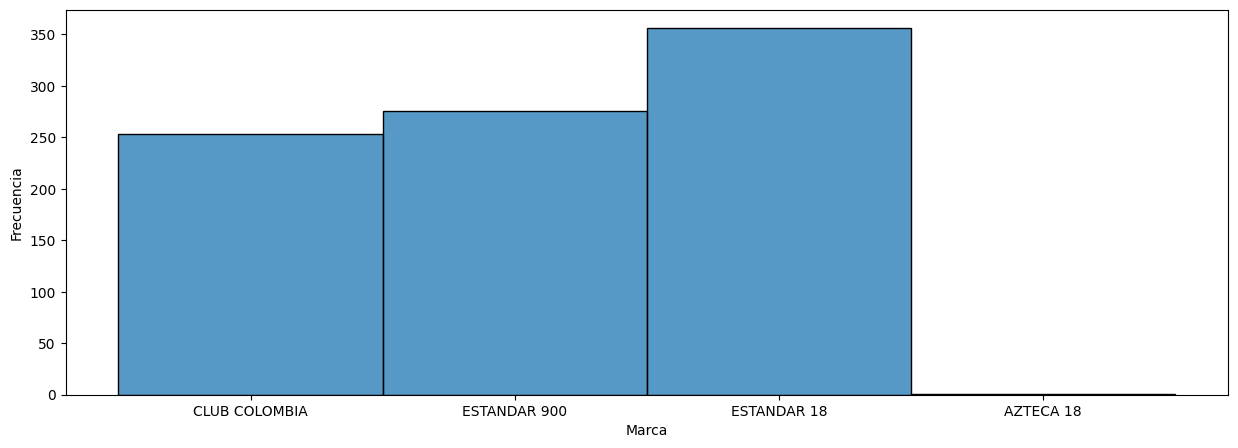

In [38]:
#Análisis univariante
#variable categórica
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1, figsize=(15, 5))

sns.histplot(df['Marca'], ax=axis).set(ylabel='Frecuencia')
plt.show()

In [39]:
#Ahora debo borrar las filas de club colombia en mi columna marca
df = df[df['Marca'] != 'CLUB COLOMBIA']
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 632 entries, 4 to 3029
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Marca                         632 non-null    object 
 1   Volumen Total de filtraci¢n   632 non-null    float64
 2   Extracto CO2                  632 non-null    float64
 3   L£pulo Pellet  Herkules       632 non-null    float64
 4   Alpha acidos herkules         632 non-null    float64
 5   Catalizador isomerizaci¢n     632 non-null    float64
 6   Amargo por cocimiento         632 non-null    float64
dtypes: float64(6), object(1)
memory usage: 39.5+ KB


In [40]:
#Variables numéricas
from utils import columnas_numericas
columnas_numericas(df)
print(columnas_numericas(df))


['Volumen Total de filtraci¢n ', 'Extracto CO2', 'L£pulo Pellet  Herkules', 'Alpha acidos herkules', 'Catalizador isomerizaci¢n', 'Amargo por cocimiento']


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 632 entries, 4 to 3029
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Marca                         632 non-null    object 
 1   Volumen Total de filtraci¢n   632 non-null    float64
 2   Extracto CO2                  632 non-null    float64
 3   L£pulo Pellet  Herkules       632 non-null    float64
 4   Alpha acidos herkules         632 non-null    float64
 5   Catalizador isomerizaci¢n     632 non-null    float64
 6   Amargo por cocimiento         632 non-null    float64
dtypes: float64(6), object(1)
memory usage: 39.5+ KB


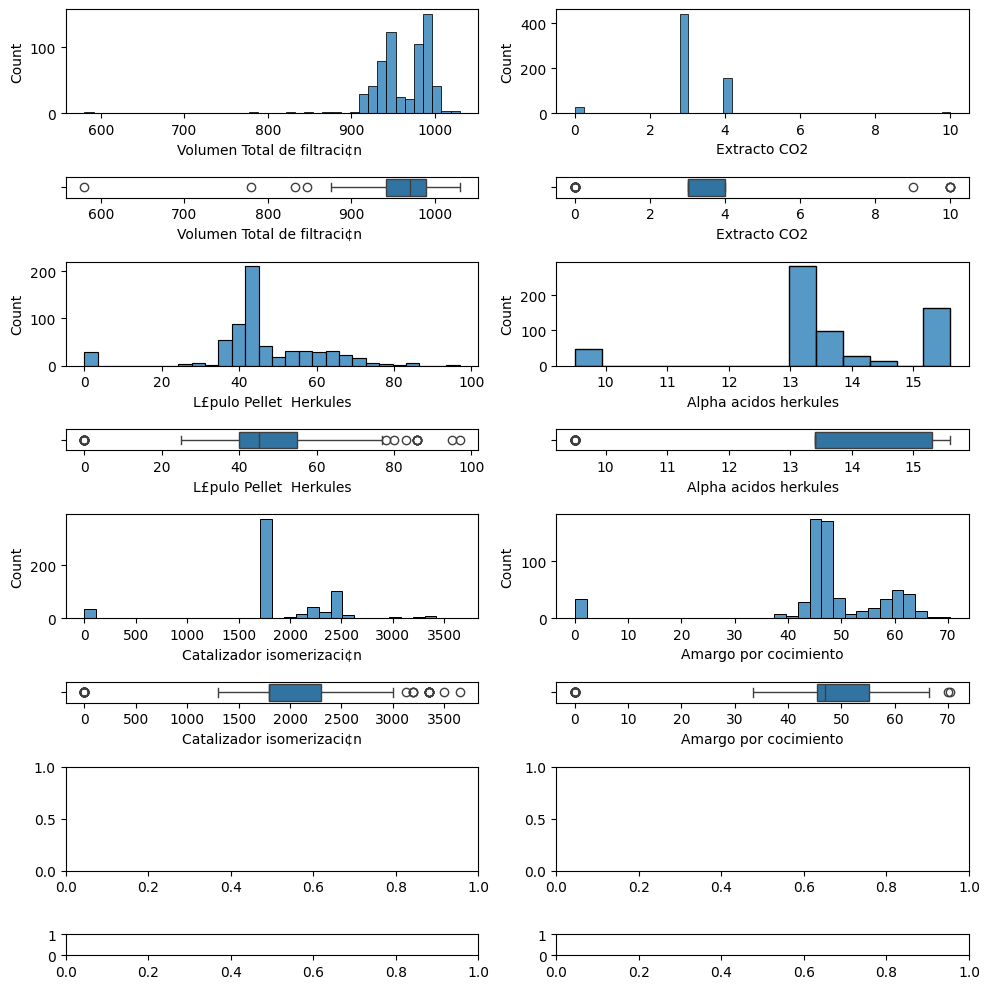

In [42]:
#Análisis univariante
#Variables numéricas
from utils import analisis_numerico_numerico
analisis_numerico_numerico(df,'Amargo por cocimiento')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 632 entries, 4 to 3029
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Marca                         632 non-null    object 
 1   Volumen Total de filtraci¢n   632 non-null    float64
 2   Extracto CO2                  632 non-null    float64
 3   L£pulo Pellet  Herkules       632 non-null    float64
 4   Alpha acidos herkules         632 non-null    float64
 5   Catalizador isomerizaci¢n     632 non-null    float64
 6   Amargo por cocimiento         632 non-null    float64
dtypes: float64(6), object(1)
memory usage: 39.5+ KB


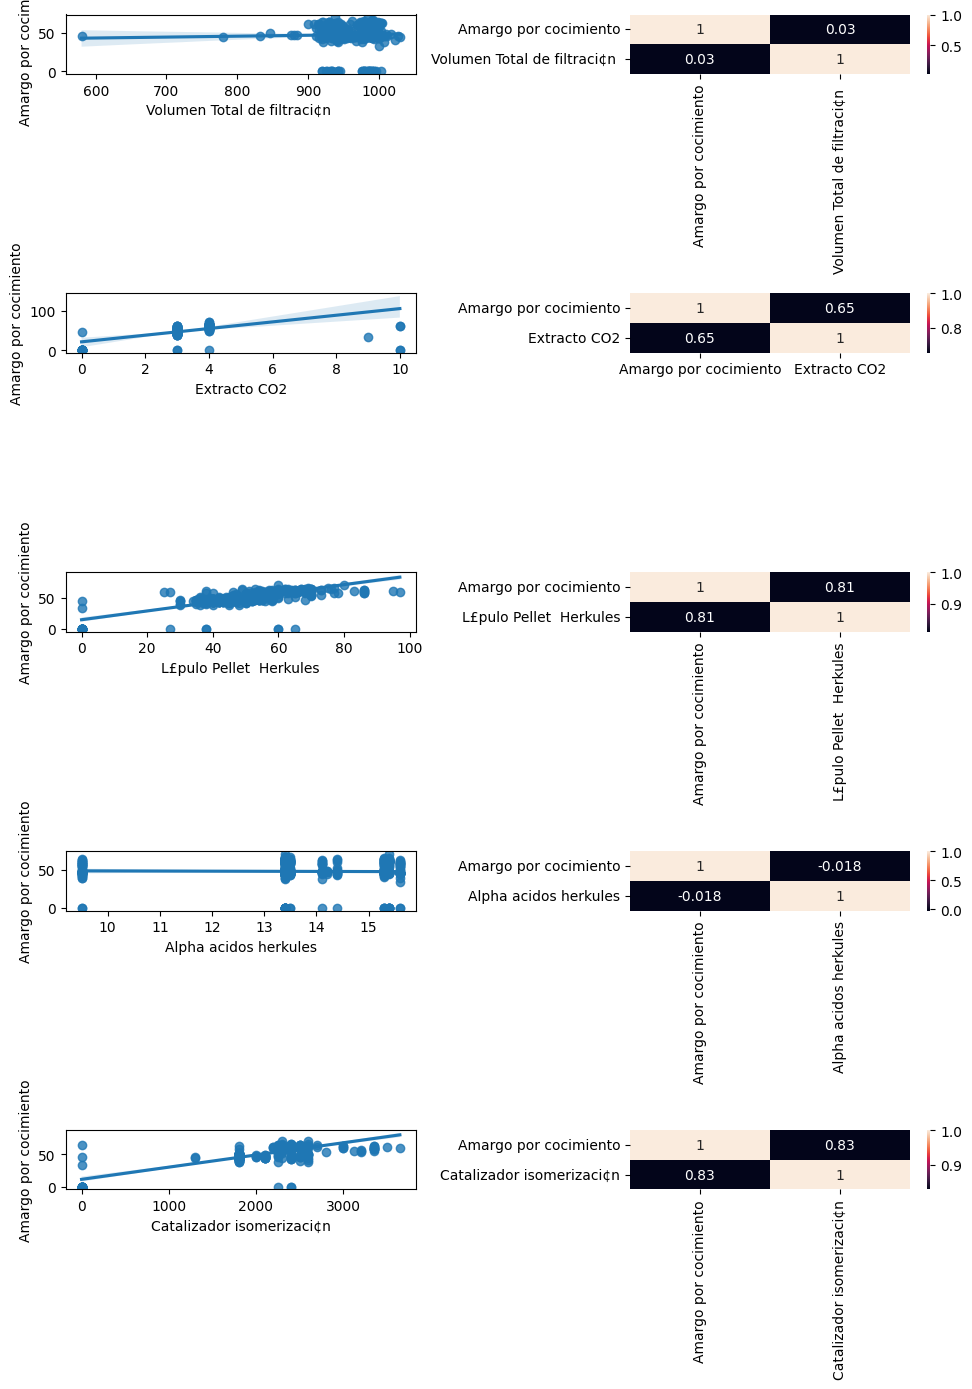

In [44]:
#Se continua con el análisis multivariable
fig, axis = plt.subplots(5, 2, figsize=(10, 14))

sns.regplot(ax=axis[0, 0], data=df, x='Volumen Total de filtraci¢n ', y='Amargo por cocimiento')
sns.heatmap(df[['Amargo por cocimiento', 'Volumen Total de filtraci¢n ']].corr(), ax=axis[0, 1], annot=True)
sns.regplot(ax=axis[1, 0], data=df, x='Extracto CO2', y='Amargo por cocimiento')
sns.heatmap(df[['Amargo por cocimiento', 'Extracto CO2']].corr(), ax=axis[1, 1], annot=True)
sns.regplot(ax=axis[2, 0], data=df, x='L£pulo Pellet  Herkules', y='Amargo por cocimiento')
sns.heatmap(df[['Amargo por cocimiento', 'L£pulo Pellet  Herkules']].corr(), ax=axis[2, 1], annot=True)
sns.regplot(ax=axis[3, 0], data=df, x='Alpha acidos herkules', y='Amargo por cocimiento')
sns.heatmap(df[['Amargo por cocimiento', 'Alpha acidos herkules']].corr(), ax=axis[3, 1], annot=True)
sns.regplot(ax=axis[4, 0], data=df, x='Catalizador isomerizaci¢n', y='Amargo por cocimiento')
sns.heatmap(df[['Amargo por cocimiento', 'Catalizador isomerizaci¢n']].corr(), ax=axis[4, 1], annot=True)

plt.tight_layout()
plt.show()

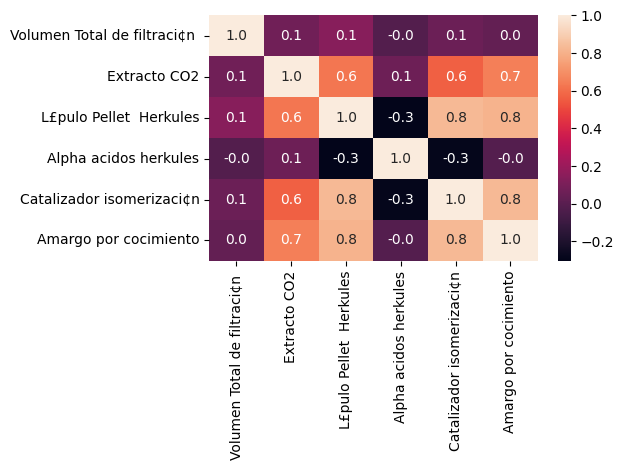

In [45]:
#Ahora análisis numérico categórico.
#Factorizo la variable categórica.
# no factorizo la categórica porque el random forest no necesita todo numérico 
df['Marca'] = pd.factorize(df['Marca'])[0]

sns.heatmap(df[['Volumen Total de filtraci¢n ','Extracto CO2','L£pulo Pellet  Herkules','Alpha acidos herkules','Catalizador isomerizaci¢n','Amargo por cocimiento']].corr(), annot=True,fmt='.1f')
plt.tight_layout()
plt.show()

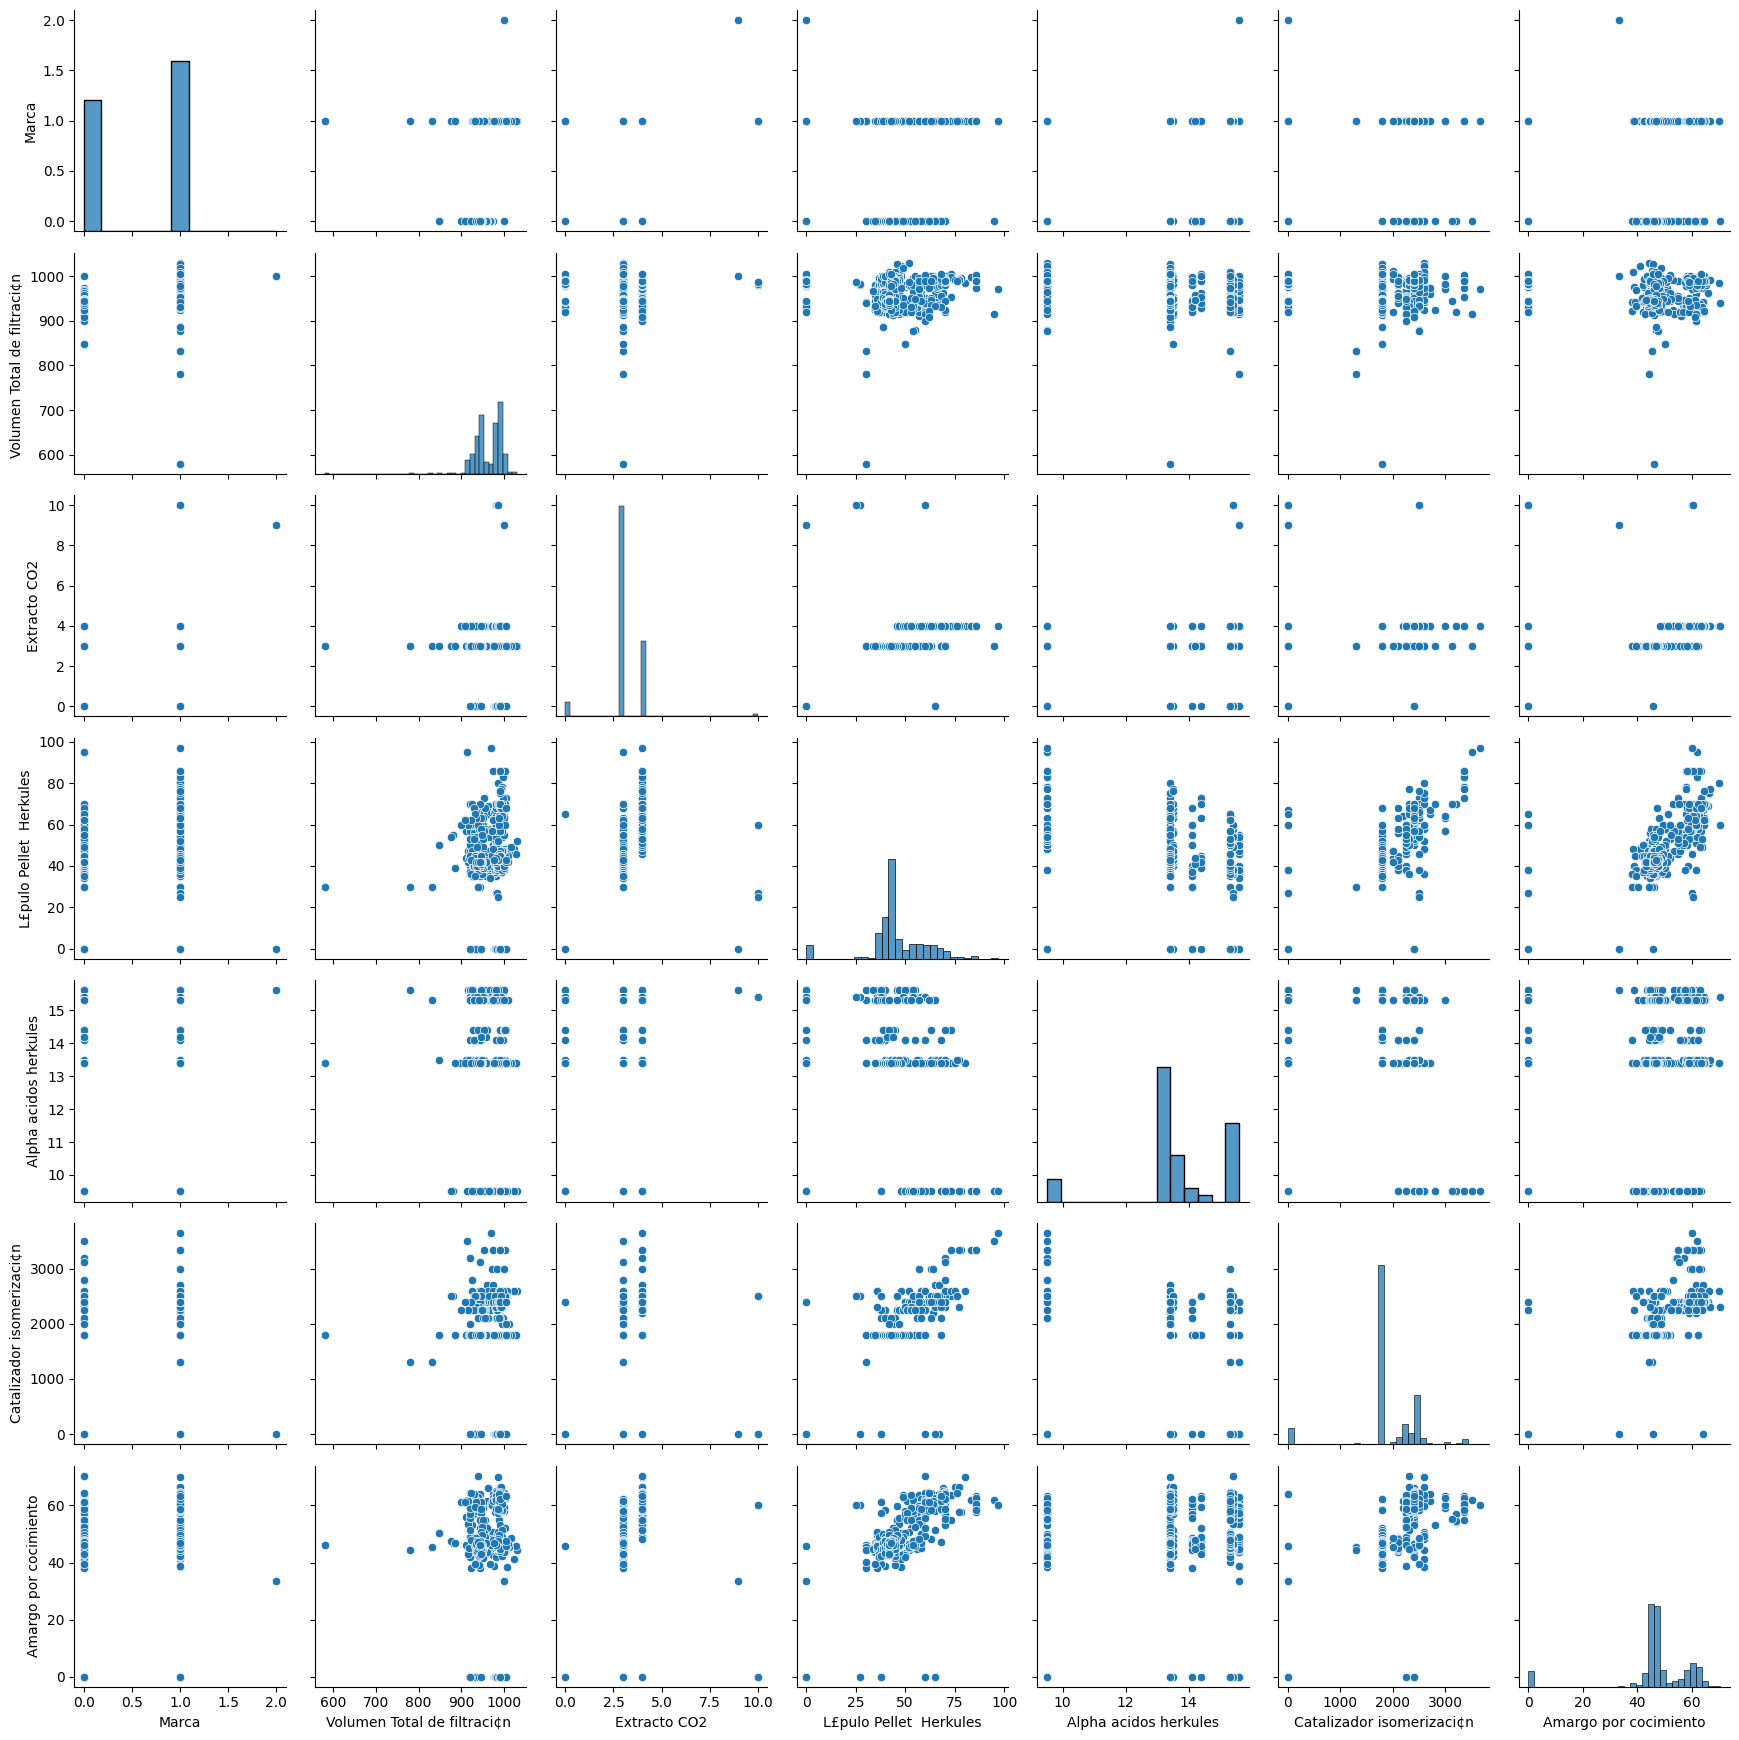

In [46]:
sns.pairplot(data=df)

plt.tight_layout()
plt.show()

In [47]:
from utils import analisis_ric
#Se calcularán los límites para retirar los datos atípicos de las variables en cuestión.
analisis_ric(df=df)

columna: Marca limites superior 2.5 e inferior -1.5
columna: Volumen Total de filtraci¢n  limites superior 1062.0 e inferior 870.0
columna: Extracto CO2 limites superior 5.5 e inferior 1.5
columna: L£pulo Pellet  Herkules limites superior 77.5 e inferior 17.5
columna: Alpha acidos herkules limites superior 18.150000000000002 e inferior 10.55
columna: Catalizador isomerizaci¢n limites superior 3050.0 e inferior 1050.0
columna: Amargo por cocimiento limites superior 69.60374999999999 e inferior 30.973750000000003


In [48]:
#df = df[(df['Marca'] >= -3) & (df['Marca'] <= 5)]
df = df[(df['Volumen Total de filtraci¢n '] >= 869.375) & (df['Volumen Total de filtraci¢n '] <= 1062.375)]
df = df[(df['Extracto CO2'] >= 3) & (df['Extracto CO2'] <= 4)]
df = df[(df['L£pulo Pellet  Herkules'] >= 32.5) & (df['L£pulo Pellet  Herkules'] <= 52.5)]
df = df[(df['Alpha acidos herkules'] >= 10.55) & (df['Alpha acidos herkules'] <= 18.15)]
df = df[(df['Catalizador isomerizaci¢n'] >= 1800) & (df['Catalizador isomerizaci¢n'] <= 3000)]
df = df[(df['Amargo por cocimiento'] >= 41.949) & (df['Amargo por cocimiento'] <= 51.07)]

In [49]:
df.shape

(379, 7)

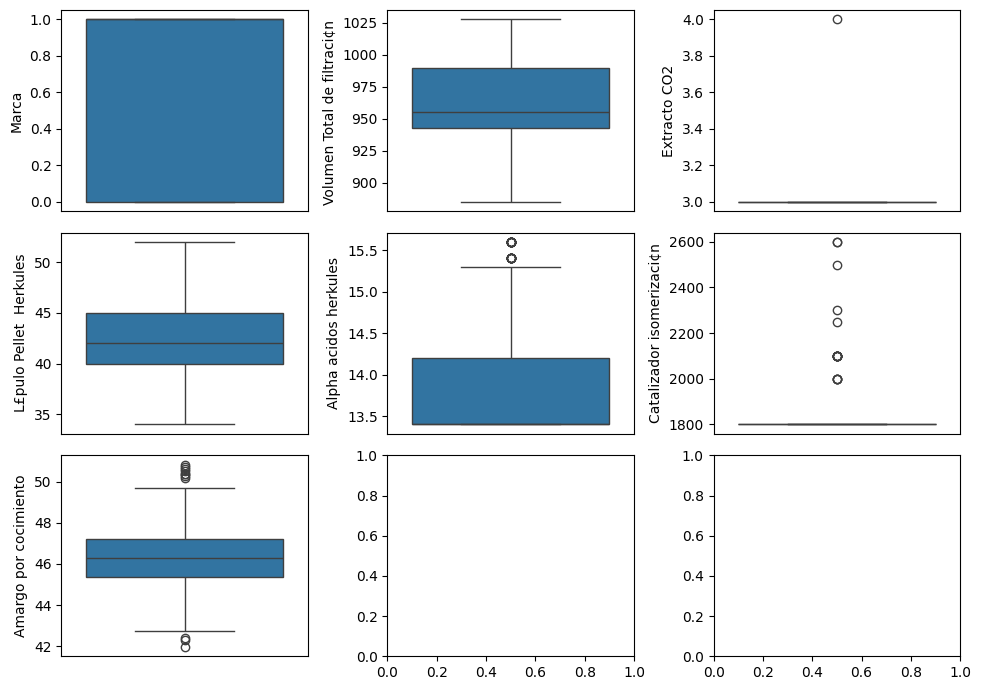

In [50]:
from utils import analisis_boxplot
analisis_boxplot(df,'Amargo por cocimiento')
#Se cuenta con los datos sin atípicos no deseados.

In [51]:
#Saco columna marca porque no me interesa, solo es std
df.drop(columns=['Marca'], inplace=True)
df.drop(columns=['Volumen Total de filtraci¢n '], inplace=True)

In [52]:
#Ahora debo dividir los datos
from sklearn.model_selection import train_test_split
#Aquí saco la columna que voy a predecir
X = df.drop(['Amargo por cocimiento'], axis=1)
#Aquí digo cuál es la columna que voy a predecir
Y = df['Amargo por cocimiento']
#Aquí hago el split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train.head()

,Extracto CO2,L£pulo Pellet Herkules,Alpha acidos herkules,Catalizador isomerizaci¢n
1917,3.0,42.0,15.3,1800.0
1160,3.0,37.0,15.3,1800.0
2204,3.0,45.0,13.4,1800.0
2187,3.0,47.0,13.4,1800.0
2267,3.0,49.0,13.4,1800.0


In [53]:
%pip install xgboost
from xgboost import XGBRegressor

model = XGBRegressor(random_state=42)

model.fit(X_train, Y_train)

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [54]:
Y_pred= model.predict(X_test)
Y_pred

array([45.840004, 46.21949 , 45.35412 , 45.944366, 46.36518 , 50.729904,
       46.40598 , 44.982822, 46.40598 , 46.842003, 46.40598 , 48.63992 ,
       45.840004, 45.944366, 46.40598 , 45.607372, 45.35412 , 45.939476,
       46.256332, 45.939476, 46.40598 , 47.39687 , 47.424206, 46.40598 ,
       45.35412 , 46.256332, 45.78584 , 46.40598 , 46.351994, 47.09514 ,
       46.36518 , 47.39687 , 45.999157, 45.78584 , 45.35412 , 46.40598 ,
       46.256332, 46.40598 , 45.939476, 46.358208, 49.0736  , 45.78584 ,
       45.78584 , 48.445652, 46.351994, 45.13796 , 46.351994, 45.478645,
       46.649803, 45.478645, 45.143536, 46.40598 , 48.63992 , 46.21949 ,
       46.649803, 47.424206, 45.78584 , 46.40598 , 48.445652, 50.815804,
       46.21949 , 44.078312, 46.649803, 46.649803, 46.256332, 44.740177,
       46.21949 , 46.649803, 46.649803, 46.842003, 46.21949 , 46.21949 ,
       45.88781 , 46.649803, 46.56688 , 46.40598 ], dtype=float32)

In [56]:
#ahora debo evaluar el modelo
from sklearn.metrics import mean_squared_error, r2_score

print(f'MSE: {mean_squared_error(Y_test, Y_pred)}')
print(f'R2: {r2_score(Y_test, Y_pred)}')

from math import sqrt
print(f'RMSE: {sqrt(mean_squared_error(Y_test, Y_pred))}')

MSE: 1.7330122574604647
R2: 0.18824460814417032
RMSE: 1.3164392342453428


In [57]:
#Hiperparametrización
from sklearn.model_selection import GridSearchCV

params = {
	'max_depth': [3, 4, 5],
	'learning_rate': [0.01, 0.1, 0.2],
	'n_estimators': [20, 50, 100, 200, 300]
}

grid = GridSearchCV(model, params, scoring='neg_mean_squared_error', cv=5, n_jobs=2)
grid.fit(X_train, Y_train)

print(grid.best_params_)
print(grid.best_estimator_)

best_model = grid.best_estimator_
mean_squared_error(Y_test,best_model.predict(X_test))

{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.2, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=50,
             n_jobs=None, num_parallel_tree=None, ...)


1.601324262130027

In [58]:
# Hacer las predicciones
Y_best_pred = best_model.predict(X_test)
Y_best_pred

array([45.954067, 46.26153 , 45.46811 , 46.08239 , 45.954067, 50.456123,
       46.292892, 45.690826, 46.292892, 46.31425 , 46.292892, 48.574898,
       45.954067, 46.08239 , 46.292892, 45.36429 , 45.46811 , 45.969116,
       46.314926, 45.969116, 46.292892, 47.404137, 47.809734, 46.292892,
       45.46811 , 46.314926, 45.77623 , 46.292892, 46.314926, 46.177727,
       45.954067, 47.404137, 45.75425 , 45.77623 , 45.46811 , 46.292892,
       46.314926, 46.292892, 45.969116, 45.72047 , 48.852234, 45.77623 ,
       45.77623 , 47.16107 , 46.314926, 45.755535, 46.314926, 45.433186,
       46.58426 , 45.433186, 45.54757 , 46.292892, 48.574898, 46.26153 ,
       46.58426 , 47.809734, 45.77623 , 46.292892, 47.16107 , 50.673534,
       46.26153 , 45.42545 , 46.58426 , 46.58426 , 46.314926, 45.095497,
       46.26153 , 46.58426 , 46.58426 , 46.31425 , 46.26153 , 46.26153 ,
       46.19721 , 46.58426 , 46.263897, 46.292892], dtype=float32)

In [59]:
#ahora debo evaluar el modelo
from sklearn.metrics import mean_squared_error, r2_score

print(f'MSE: {mean_squared_error(Y_test, Y_best_pred)}')
print(f'R2: {r2_score(Y_test, Y_best_pred)}')

from math import sqrt
print(f'RMSE: {sqrt(mean_squared_error(Y_test, Y_best_pred))}')

#Error en 1 unidad de amargo, ok!

MSE: 1.601324262130027
R2: 0.24992821124159792
RMSE: 1.2654344163685556


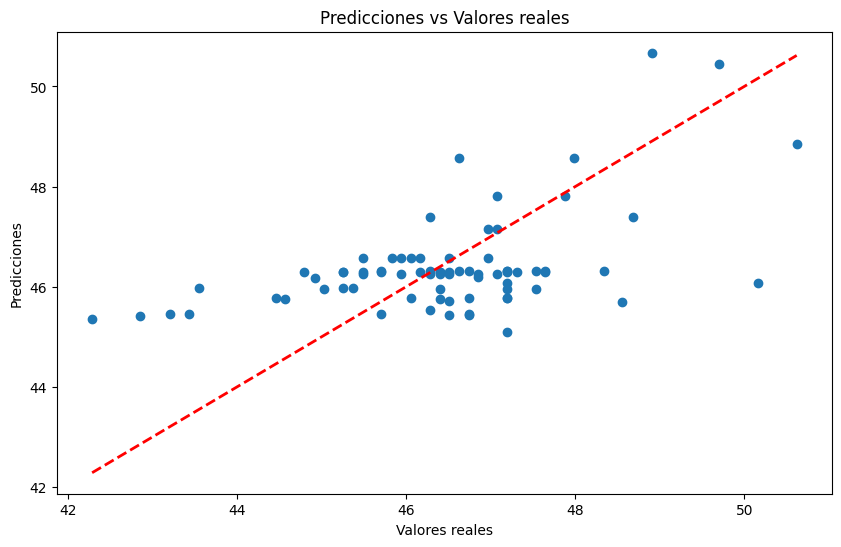

In [60]:
import matplotlib.pyplot as plt


# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_best_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores reales')
plt.show()

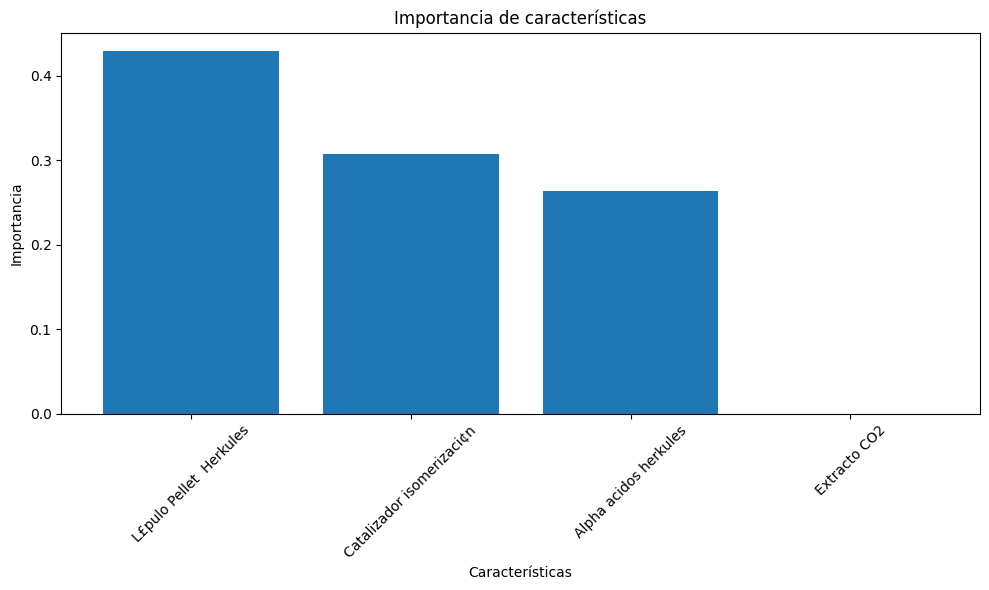

In [61]:
importancia = pd.DataFrame({
    'caracteristica': X_train.columns,
    'importancia': best_model.feature_importances_
})
importancia = importancia.sort_values('importancia', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(importancia['caracteristica'], importancia['importancia'])
plt.xticks(rotation=45)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de características')
plt.tight_layout()
plt.show()